## Cost of Living vs. GDP (by Country)
The propsed hypothesis for this notebook is: "Cost of Living increases with the increase of a Nations Gross Domestic Product". 
To test this hypothesis the following notebook will look to explore the relation between these two common performance metrics of a range of countries.

### Import libraries and prepare the general dataset
Import the appropriate libraries that will be used for analysis throughout the notebook. Additionally, perpare the dataset for analysis.
This dataset was acquired from the OECD Statistics data website, and comprises the GDP of the OECD member nations over the period 2016 to present.

In [108]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load current .csv dataset for GDP data
        # data = urllib.request.urlopen('https://www.oecd-ilibrary.org/economics/data/oecd-stat/data-warehouse_data-00900-en')
data = "datasets/GDP_2016_2020.csv" # Represents most recent data for each country, some countries report data more regularly

        # columns = {'Country','Metric', 'Subject','Measure', 'Frequency','Year', 'Value', 'Flag'}
raw_df = pd.read_csv(data)

raw_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,GDP,TOT,USD_CAP,A,2016,50237.794429,NaN
1,AUS,GDP,TOT,USD_CAP,A,2017,50853.615427,NaN
2,AUS,GDP,TOT,USD_CAP,A,2018,53061.634053,NaN
3,AUS,GDP,TOT,USD_CAP,A,2019,53067.877181,E
4,AUT,GDP,TOT,USD_CAP,A,2016,52665.087457,NaN


### Keep only most relevant entry for each country
Since the dataset encompases reported GDP data from each country over the period of 2016 to present, some countries will report these values at different intervals than others.
This will result in multiple entries for many nations, but only single entries for other. All of which are distributed over several years.
Here the data is processed to only retain the most recent reported entry for each country (removing the previous entries), so that only one entry per country remains.

In [109]:
# Sort the GDP data by Year.
df = raw_df.copy().sort_values(by='TIME', ascending=False)
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
99,POL,GDP,TOT,USD_CAP,A,2020,33356.123878,NaN
13,BEL,GDP,TOT,USD_CAP,A,2020,51688.583464,P
32,FIN,GDP,TOT,USD_CAP,A,2020,50176.937881,NaN
27,DNK,GDP,TOT,USD_CAP,A,2020,59346.890596,NaN
166,SVN,GDP,TOT,USD_CAP,A,2020,38727.415299,NaN


In [110]:
# From the sorted data, drop the reported values for each country except the most recent report.
df = df.drop_duplicates(subset=['LOCATION'], keep='first')
df = df.drop(columns=['Flag Codes','SUBJECT','FREQUENCY'])
df.head()

,LOCATION,INDICATOR,MEASURE,TIME,Value
99,POL,GDP,USD_CAP,2020,33356.123878
13,BEL,GDP,USD_CAP,2020,51688.583464
32,FIN,GDP,USD_CAP,2020,50176.937881
27,DNK,GDP,USD_CAP,2020,59346.890596
166,SVN,GDP,USD_CAP,2020,38727.415299


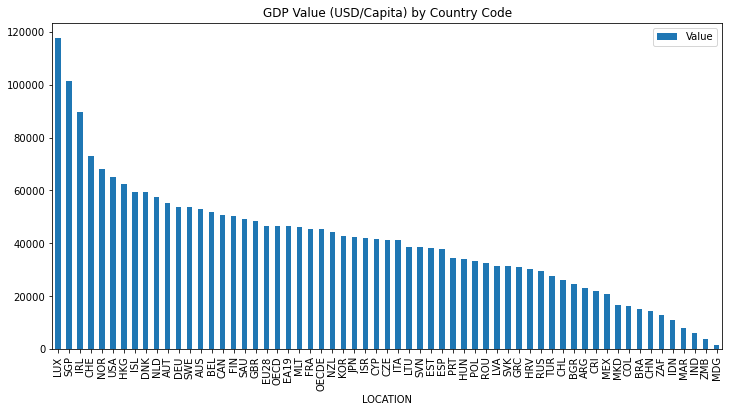

In [111]:
# Plot the GDP data for each country code.
df = df.sort_values(by='Value', ascending=False)
df[['LOCATION','Value']].plot(kind='bar', x='LOCATION', figsize=(12,6), title='GDP Value (USD/Capita) by Country Code')
plt.show()

### Get Country names from Country Code
Due to the format of the GDP data that was aqcuired the label of each country in the dataset was a 3 letter country code, rather than the country's name itself.
To allow the data to be more human readable, the data would need appropriate labelling to identify the country by name.
Through some additional processing these country codes could be matched with their corresponding country name.

In [112]:
# Fetch country code from website.
codes_df = pd.read_html('https://laendercode.net/en/3-letter-list.html')[0]
codes_df.head()

,ISO 3166 ALPHA-3,Country
0,AFG,Afghanistan
1,ALA,Aland Islands
2,ALB,Albania
3,DZA,Algeria
4,ASM,American Samoa


In [113]:
# Join the sorted data on the Country code, to get appropriate country name
merged_df = df.merge(codes_df, left_on=['LOCATION'], right_on=['ISO 3166 ALPHA-3'])
merged_df.head()

,LOCATION,INDICATOR,MEASURE,TIME,Value,ISO 3166 ALPHA-3,Country
0,LUX,GDP,USD_CAP,2020,117619.647997,LUX,Luxembourg
1,SGP,GDP,USD_CAP,2018,101280.413499,SGP,Singapore
2,IRL,GDP,USD_CAP,2019,89561.458769,IRL,Ireland
3,CHE,GDP,USD_CAP,2019,73114.493516,CHE,Switzerland
4,NOR,GDP,USD_CAP,2020,68117.123175,NOR,Norway


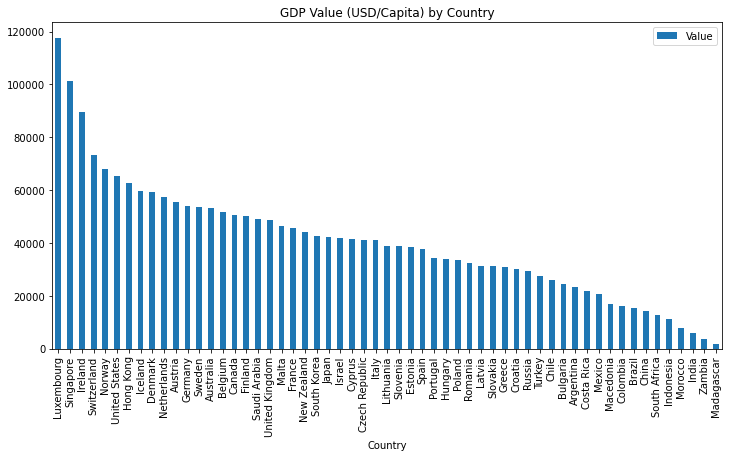

In [114]:
# Plot data with country names
merged_df[['Country','Value']].plot(kind='bar', x='Country', figsize=(12,6), title='GDP Value (USD/Capita) by Country')
plt.show()

After this processing, it can be seen that the GDP Value data was now more human readable with the Country names present.

The next step in the analysis was to combine this data with Cost of Living data and identify any possible relations between the datasets.

## Acquire the Cost of Living Index data
The cost of living index data was available through the Numbeo website (https://www.numbeo.com/cost-of-living/rankings_by_country.jsp) for academic use, which was ideal for this project.

The data gathered by Numbeo for the cost of living index, was a relative index for the price of consumer goods (including rent) compared to New York City. This relative index acts as a percentage comparison between New York (100%) and the reported nations.

In [115]:
# Load table data from Numbeo for the Cost of Living Index data for the year 2020
# col_df = pd.read_html('https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2021&displayColumn=0')[1]  # Does not include rent
col_df = pd.read_html('https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2021&displayColumn=2')[1]    # Includes rent
col_df

,Rank,Country,Cost of Living Plus Rent Index
0,NaN,Bermuda,120.13
1,NaN,Switzerland,95.10
2,NaN,Norway,72.68
3,NaN,Iceland,71.16
4,NaN,Denmark,65.16
...,...,...,...
133,NaN,Afghanistan,15.59
134,NaN,India,15.90
135,NaN,Kyrgyzstan,15.55
136,NaN,Libya,14.37


### Combine Datasets
With the GDP and Cost of Living data now available and processed appropriately, these datasets could be combined for further analysis.

In [116]:
# Merge the GDP and Cost of Livining Index data
merged_df = merged_df.merge(col_df, left_on=['Country'], right_on=['Country'])
merged_df

,LOCATION,INDICATOR,MEASURE,TIME,Value,ISO 3166 ALPHA-3,Country,Rank,Cost of Living Plus Rent Index
0,LUX,GDP,USD_CAP,2020,117619.647997,LUX,Luxembourg,NaN,75.54
1,SGP,GDP,USD_CAP,2018,101280.413499,SGP,Singapore,NaN,75.64
2,IRL,GDP,USD_CAP,2019,89561.458769,IRL,Ireland,NaN,65.10
3,CHE,GDP,USD_CAP,2019,73114.493516,CHE,Switzerland,NaN,95.10
4,NOR,GDP,USD_CAP,2020,68117.123175,NOR,Norway,NaN,72.68
5,USA,GDP,USD_CAP,2019,65240.379025,USA,United States,NaN,57.21
6,HKG,GDP,USD_CAP,2018,62556.240500,HKG,Hong Kong,NaN,77.22
7,ISL,GDP,USD_CAP,2019,59567.238223,ISL,Iceland,NaN,71.16
8,DNK,GDP,USD_CAP,2020,59346.890596,DNK,Denmark,NaN,65.16
9,NLD,GDP,USD_CAP,2020,57482.115092,NLD,Netherlands,NaN,59.85


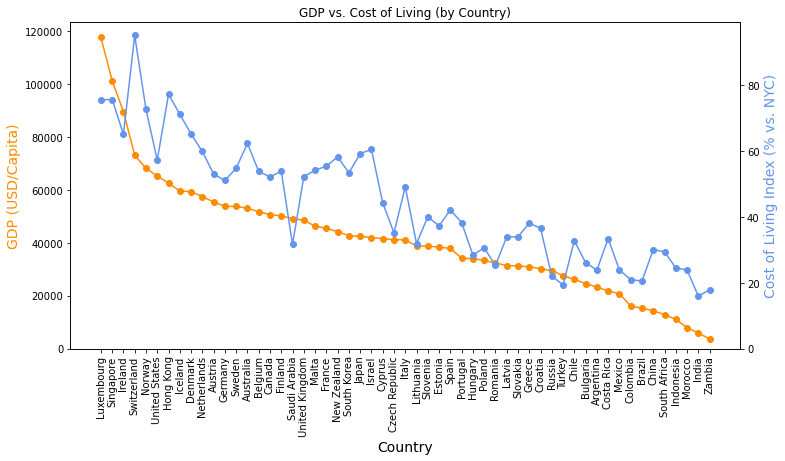

In [119]:
# Create a figure for the combined plot
fig,ax = plt.subplots(figsize=(12,6))

# Plot the GDP data on the first axis
ax.plot(merged_df['Country'], merged_df['Value'], color="darkorange", marker="o")
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel("GDP (USD/Capita)",color="darkorange",fontsize=14)
ax.set_ylim(ymin=0)

# Create a twin object from the first axis, to allow two different y-axis on the same plot
ax2=ax.twinx()

# Plot the Cost of Living data on the second axis
ax2.plot(merged_df['Country'], merged_df['Cost of Living Plus Rent Index'], color="cornflowerblue", marker="o")
ax2.set_ylabel("Cost of Living Index (% vs. NYC)", color="cornflowerblue", fontsize=14)
ax2.set_ylim(ymin=0)
ax.set_title('GDP vs. Cost of Living (by Country)')

# Ensure the country labels are rotated to be readable
ax.tick_params(axis='x', labelrotation = 90)

plt.show()

## GDP and Cost of Living Correlation
From the plot comparison there is some visual evidence that a relation exists between the GDP of a nation and its cost of living.
Further analysis would help clarify these initial impressions, which could be performed through the Pearson's Correlation coefficient.
Due to the variability in the data, the Spearman Rank Correlation would also be performed.

In [120]:
# Pearson's Correlation Coefficient
pearson = merged_df['Value'].corr(merged_df['Cost of Living Plus Rent Index'])
spearman = merged_df['Value'].corr(merged_df['Cost of Living Plus Rent Index'], method='spearman')
print(f'Pearson\'s Correlation Coefficient between GDP Value and Cost of Living Index: {pearson}')
print(f'Spearman\'s Rank Correlation between GDP Value and Cost of Living Index: {spearman}')

Pearson's Correlation Coefficient between GDP Value and Cost of Living Index: 0.8571927120757248
Spearman's Rank Correlation between GDP Value and Cost of Living Index: 0.9072150072150075


## Result
Since the result of the Pearson's Correlation coefficient indicate that there is a strong relation between the variables 'GDP Value' and 'Cost of Living'.
Though these variables are not related by a 1:1 ratio, there is a strong indication that as GDP increases for a given country, so to would its Cost of Living be expected to increase by a similar proportion.

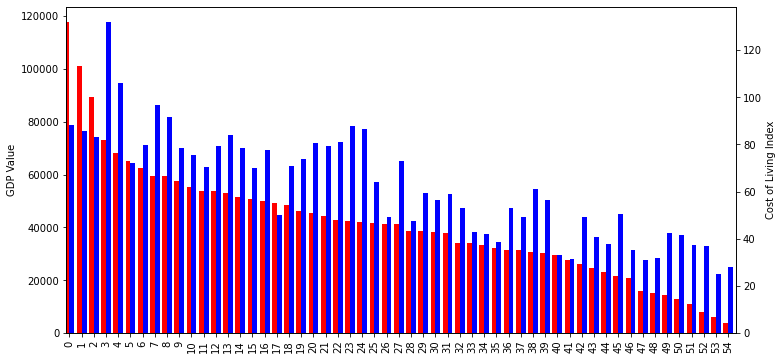

In [57]:
# # TEST Plot
# # See if would be more clear than scatter plot... 
# # It is not.
# fig = plt.figure(figsize=(12,6)) # Create matplotlib figure

# ax = fig.add_subplot(111) # Create matplotlib axes
# ax2 = ax.twinx()          # Create another axes that shares the same x-axis as ax.

# width = 0.4

# merged_df['Value'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
# merged_df['Cost of Living Index'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

# ax.set_ylabel('GDP Value')
# ax2.set_ylabel('Cost of Living Index')

# plt.show()